# Saliency detector

## Extraction of significant moments of the game, based on the Stockfish score

## 0. Intro

With the aim to detect and select salient moments of a match, the saliency_detector module provides some basic filtering activities. Filtered datasets have been mostly used during the linear regression analysis (in which the Stockfish score is the response variable), with the aim of removing noisy data points, hoping to improve the models.

Here we propose simple use cases, mostly as data visualization. For more details see the source code.


Import of the module responsible for saliecy detection activities.

In [1]:
import sys
sys.path.insert(1, '../')

from filters import saliecy_detector as sd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)

In [12]:
# Some default parameters
DFT_MATCH_ID = 5
DFT_TOLERANCE = 0.25
DFT_WINDOW_SIZE = 5

For testing purposes, load a csv containing the metrics of 10 Fischer games; then select the first match (with id 0).

In [13]:
df_complete = sd.load_csv_into_df('../resources/cached_metrics_dataframes/Fischer_metrics_match_0to9.csv')
df_moves = sd.get_match_by_id(df_complete, match_id=DFT_MATCH_ID)
df_moves = df_moves.reset_index(drop=True)
df_moves.head()

,match_id,move_id,score_before,score,player,defense_cc,defense_density,defended_nodes,defense_avg_path,defense_btw,...,attack_edges,attack_nodes,attack_maxdegree,attack_pagerank_m,attack_pagerank_sd,attack_hubscore,attack_authority,attack_in_assortativity,attack_out_assortativity,attack_indegree
0,5,0,36,21,Fischer,15,0.083333,0.8750,1.400000,0.750000,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,1,21,44,Fischer,15,0.083333,0.8750,1.400000,0.750000,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,2,44,26,Fischer,15,0.066667,0.8125,1.440000,0.733333,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,3,26,47,Fischer,15,0.079167,0.8125,1.392857,0.733333,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,4,47,46,Fischer,12,0.087500,0.8125,2.567164,7.000000,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


A basic data visualization.

1. sd.smooth(): to make the time series values more "smooth", using a moving average.
2. sd.diff(): simple subtraction between the current value and the previous one.

<IPython.core.display.Javascript object>


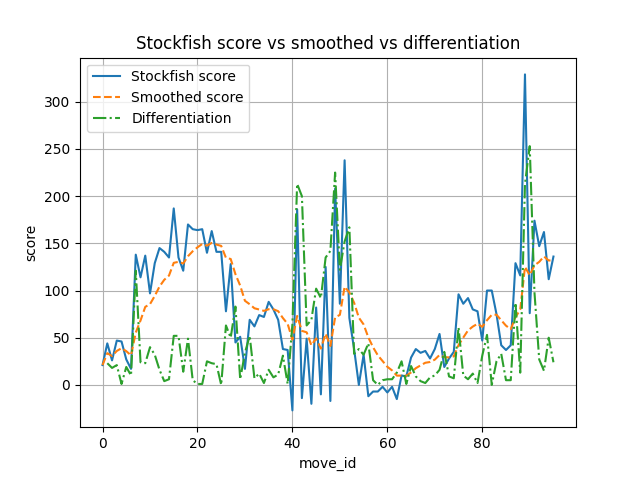

Text(0, 0.5, 'score')

In [14]:
%matplotlib notebook

# Original Stockfish score column
df_moves['score'].plot(style='-', label='Stockfish score')

# Smoothed
smoothed_values = sd.smooth(df_moves, window_size=10)
smoothed_values.plot(style='--', label='Smoothed score')

# Differentiation
diff_values = sd.diff(df_moves)
diff_values.plot(style='-.', label='Differentiation', grid='y')

plt.legend()
plt.title("Stockfish score vs smoothed vs differentiation")
plt.xlabel('move_id')
plt.ylabel('score')

## 1. Relevant moves by "score jump"

The aim of this saliecy detection filter is to highlight the relevant moves for the selected match_id and, for each one, to return a "window" made up of a total of *n* rows; *tolerance* refers to the selection criterion, expressed as a percentage of the maximum Stockfish value (for more details, see the comments directly on the source code).

In [15]:
result = sd.get_relevant_moves_by_match(df_moves, match_id=DFT_MATCH_ID, tolerance=DFT_TOLERANCE, 
                                        window_size=DFT_WINDOW_SIZE, mark_moves=True)
df_relevant_moves = result[0]
df_relevant_moves.head(10)

,match_id,move_id,score_before,score,player,defense_cc,defense_density,defended_nodes,defense_avg_path,defense_btw,...,attack_nodes,attack_maxdegree,attack_pagerank_m,attack_pagerank_sd,attack_hubscore,attack_authority,attack_in_assortativity,attack_out_assortativity,attack_indegree,relevant
5,5,5,46,27,Fischer,10,0.109524,0.866667,2.558442,8.000000,...,3,2,0.333333,0.170508,0.666667,0.333333,0.000000,0.000000,0.133333,0
6,5,6,27,17,Fischer,11,0.076190,0.800000,2.689655,7.000000,...,3,2,0.333333,0.170508,0.666667,0.333333,0.000000,0.000000,0.133333,0
7,5,7,17,138,Fischer,9,0.126374,0.928571,2.558442,8.000000,...,2,1,0.500000,0.149123,0.500000,0.500000,0.000000,0.000000,0.071429,1
8,5,8,138,114,Fischer,13,0.065934,0.785714,1.523810,0.846154,...,2,1,0.500000,0.149123,0.500000,0.500000,0.000000,0.000000,0.071429,0
9,5,9,114,137,Fischer,13,0.098901,0.857143,1.428571,0.857143,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
26,5,26,141,78,Fischer,9,0.126374,0.928571,2.346667,7.769231,...,4,1,0.250000,0.074561,0.500000,0.500000,0.000000,0.000000,0.142857,0
27,5,27,78,128,Fischer,8,0.109890,0.857143,2.416667,7.285714,...,7,2,0.142857,0.037070,0.142857,0.285714,0.000000,-0.818182,0.285714,0
28,5,28,128,45,Fischer,9,0.141026,1.000000,2.263889,6.500000,...,4,1,0.250000,0.074561,0.500000,0.500000,0.000000,0.000000,0.153846,1
29,5,29,45,51,Fischer,9,0.096154,0.846154,2.764706,6.923077,...,9,2,0.111111,0.051152,0.333333,0.333333,-0.862069,-0.800000,0.461538,0
30,5,30,51,17,Fischer,9,0.134615,1.000000,2.084746,4.923077,...,2,1,0.500000,0.149123,0.500000,0.500000,0.000000,0.000000,0.076923,0


For convenience, one can directly access the selected moves_id as list.

In [16]:
relevant_moves = result[1]
relevant_moves

[7, 28, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 87, 89, 90, 91]

<IPython.core.display.Javascript object>


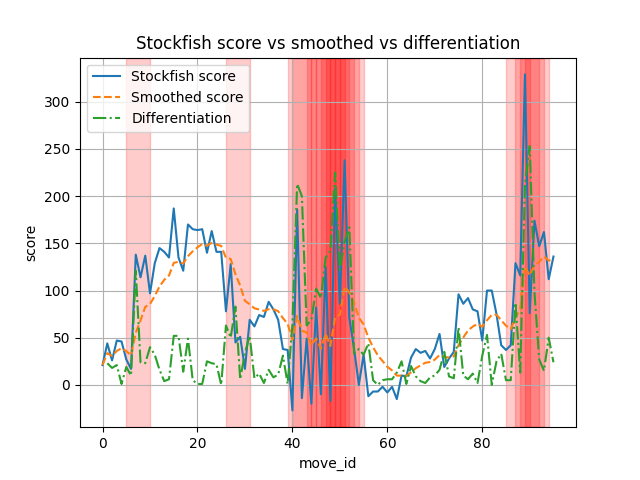

In [18]:
%matplotlib notebook

df_moves['score'].plot(style='-', label='Stockfish score')
sd.smooth(df_moves, window_size=10).plot(style='--', label='Smoothed score')
sd.diff(df_moves).plot(style='-.', label='Differentiation', grid='y')

plt.legend()
plt.title("Stockfish score vs smoothed vs differentiation")
plt.xlabel('move_id')
plt.ylabel('score')

for i in sd.get_slices_from_list(relevant_moves, window_size=DFT_WINDOW_SIZE):
    plt.axvspan(i.start, i.stop, color='red', alpha=0.2)
    
plt.savefig('Fischer_match-5.png', dpi=300)
plt.show()    

## 2. Relevant moves by "score inversion"

This second saliecy detection filter extracts all the "zero-crossing" of the Stockfish score, or whenever, during the game, the advantage passes from whites to blacks, or vice versa.

In [9]:
result = sd.get_score_inversions_by_match(df_moves, match_id=DFT_MATCH_ID, 
                                          window_size=DFT_WINDOW_SIZE, mark_moves=True)
df_relevant_moves = result[0]
df_relevant_moves.head(10)

,match_id,move_id,score_before,score,player,defense_cc,defense_density,defended_nodes,defense_avg_path,defense_btw,...,attack_nodes,attack_maxdegree,attack_pagerank_m,attack_pagerank_sd,attack_hubscore,attack_authority,attack_in_assortativity,attack_out_assortativity,attack_indegree,relevant
9,6,9,15,27,Fischer,13,0.091667,0.8750,2.231884,5.3125,...,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0
10,6,10,27,12,Fischer,11,0.100000,0.9375,2.282051,6.2500,...,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0
11,6,11,12,13,Fischer,11,0.100000,0.9375,2.282051,6.2500,...,2,1,0.5,0.149123,0.5,0.5,0.0,0.0,0.0625,1
12,6,12,13,-30,Fischer,12,0.095833,0.9375,2.132353,4.8125,...,2,1,0.5,0.149123,0.5,0.5,0.0,0.0,0.0625,1
13,6,13,-30,1,Fischer,12,0.095833,0.9375,2.132353,4.8125,...,2,1,0.5,0.149123,0.5,0.5,0.0,0.0,0.0625,1
14,6,14,1,-9,Fischer,10,0.116667,0.9375,2.450450,10.0625,...,2,1,0.5,0.149123,0.5,0.5,0.0,0.0,0.0625,1
15,6,15,-9,13,Fischer,12,0.095833,0.9375,2.257143,5.5000,...,2,1,0.5,0.149123,0.5,0.5,0.0,0.0,0.0625,1
16,6,16,13,-64,Fischer,10,0.112500,0.8750,2.401961,8.9375,...,2,1,0.5,0.149123,0.5,0.5,0.0,0.0,0.0625,0
17,6,17,-64,-52,Fischer,13,0.104167,0.8750,1.814815,2.7500,...,2,1,0.5,0.149123,0.5,0.5,0.0,0.0,0.0625,0
18,6,18,-52,-51,Fischer,7,0.100000,0.8750,3.191176,18.6250,...,2,1,0.5,0.149123,0.5,0.5,0.0,0.0,0.0625,0


As before, it could be useful to directly access the selected moves_id as list.

In [10]:
relevant_moves = result[1]
relevant_moves

[11, 12, 13, 14, 15, 20, 29, 38, 39, 40, 44, 45, 46, 47, 48, 49]

<IPython.core.display.Javascript object>


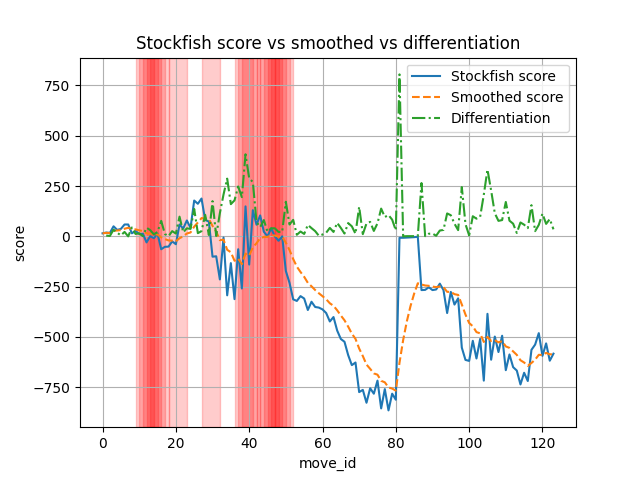

In [11]:
%matplotlib notebook

df_moves['score'].plot(style='-', label='Stockfish score')
sd.smooth(df_moves, window_size=10).plot(style='--', label='Smoothed score')
sd.diff(df_moves).plot(style='-.', label='Differentiation', grid='y')

plt.legend()
plt.title("Stockfish score vs smoothed vs differentiation")
plt.xlabel('move_id')
plt.ylabel('score')

for i in sd.get_slices_from_list(relevant_moves, window_size=DFT_WINDOW_SIZE):
    plt.axvspan(i.start, i.stop, color='red', alpha=0.2)